# Case Study

## Part 1

1. Load in the data in `companies.csv` and `prices.csv` (in the data folder).

In [1]:
import pandas as pd

In [2]:
companies = pd.read_csv('../data/companies.csv')
prices = pd.read_csv('../data/prices.csv')

2. Write a function `is_incorporated` that checks whether an input string, `name`, contains the substring "inc" or "Inc". Its definition should look like this:
```python
def is_incorporated(name):
```
(Yes, all these companies are *technically* incorporated, but bear with us for the exercise.)
<br>
*Hint: you may want to google something like "check if one string is within another Python"*

In [3]:
def is_incorporated(name):
    '''Checks if a company name contains some variant of "inc"'''
    # The 'in' operator checks if one string is within another.
    if 'inc' in name:
        return True
    elif 'Inc' in name:
        return True
    else:
        return False

3. Test this function to be sure it works. Try passing in some strings that contain the substring and some that don't. Test it on data from the companies DataFrame.

In [4]:
companies.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [5]:
is_incorporated('3M Company')

False

In [6]:
is_incorporated('AbbVie Inc.')

True

In [7]:
is_incorporated('Accenture plc')

False

4. Write a `for` loop to iterate through the elements in the Name column of the companies data, applying `is_incorporated` to each element and printing the result.

In [8]:
# Loop through elements in the "Name" column
for company_name in companies['Name']:
    result = is_incorporated(company_name)
    print(result)

False
False
False
True
False
False
True
True
False
True
False
True
True
True
True
True
True
True
False
True
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
True
False
True
False
False
True
True
False
False
True
False
False
True
False
False
False
True
True
False
False
True
False
True
True
True
False
True
True
False
False
False
False
True
False
False
False
True
True
False
False
False
True
False
False
False
True
False
False
False
False
True
False
False
False
False
True
True
False
True
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
False
False
True
False
False
True
False
False
False
False
False
True
False
False
False
False
False
True
False
True
False
True
False
True
False
False
False
False
True
False
True
False
False
True
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
True
False
False
T

5. Now rewrite the code for #4 using the `Series.apply` method -- apply the function to the Series and print the resulting Series.

In [9]:
# Much simpler!
companies['Name'].apply(is_incorporated)

0      False
1      False
2      False
3       True
4      False
       ...  
500     True
501     True
502    False
503    False
504    False
Name: Name, Length: 505, dtype: bool

6. *Similar, but less guided.* Create a new column, name_length, whose value is:
    - `"long"` if the company name is over 12 characters
    - `"medium"` if the company name is 8-11 characters
    - `"short"` if the company name is 7 or fewer characters.

In [10]:
def get_name_length(name):
    '''Determines if a company name is short, medium, or long.'''
    length = len(name)
    if length > 12:
        return 'long'
    elif 8 <= length <= 12:
        return 'medium'
    else: # Name must be less than 8 characters
        return 'short'

In [11]:
# Add a new column using this function
companies['name_length'] = companies['Name'].apply(get_name_length)

In [12]:
companies.head()

,Symbol,Name,Sector,name_length
0,MMM,3M Company,Industrials,medium
1,AOS,A.O. Smith Corp,Industrials,long
2,ABT,Abbott Laboratories,Health Care,long
3,ABBV,AbbVie Inc.,Health Care,medium
4,ACN,Accenture plc,Information Technology,long


7. Write a function `make_colname_string` that takes a DataFrame as an argument and returns a string that contains all the DataFrame's columns' names, comma separated. For example, running `make_colname_string` on our companies data would look like this:<br><br>
```python
make_colname_string(companies)
#> 'Symbol,Name,Sector'
```
<br>*Hint: a `for` loop will be helpful.*
<br>Test it on the prices data. What does it return?

In [13]:
def make_colname_string(df):
    '''Concatenate a DataFrame's column names.'''
    # Start with a blank string that we can add to incrementally.
    result_str = ''
    for colname in df.columns:
        # This is tricky! Only add the column if it's not the first element
        if len(result_str) == 0:
            result_str = colname
        else:
            result_str = result_str + ',' + colname
    return result_str

In [14]:
make_colname_string(prices)

'Symbol,Price,Quarter'

### Putting It All Together
Suppose you've discovered a great secret about the stock market: companies with long names (as defined above) are going to double in value after quarter 4 (our most recent data), companies with short names are going to halve in value, and medium-name companies will stay exactly the same. Create a dataset of the form:

| Name | Symbol | Projected |
-------|--------|------------

Where "Projected" is the projected price of the company's stock (2x, 1x, .5x as explained above). Note that you will need to join companies to prices and do some data wrangling operations.

In [15]:
# Join companies to their prices so we can get Name and Price in a single table.
merged = pd.merge(companies, prices, on='Symbol')
merged.head()

,Symbol,Name,Sector,name_length,Price,Quarter
0,MMM,3M Company,Industrials,medium,150.259437,1
1,MMM,3M Company,Industrials,medium,134.425207,2
2,MMM,3M Company,Industrials,medium,135.013910,3
3,MMM,3M Company,Industrials,medium,137.325815,4
4,AOS,A.O. Smith Corp,Industrials,long,103.668371,1


In [16]:
# We only need quarter four prices. Copying avoids a later pandas warning, but it's not required.
q4_prices = merged[merged['Quarter'] == 4].copy()
q4_prices.head()

,Symbol,Name,Sector,name_length,Price,Quarter
3,MMM,3M Company,Industrials,medium,137.325815,4
7,AOS,A.O. Smith Corp,Industrials,long,79.161250,4
11,ABT,Abbott Laboratories,Health Care,long,255.549157,4
15,ABBV,AbbVie Inc.,Health Care,medium,312.456143,4
19,ACN,Accenture plc,Information Technology,long,221.431614,4


In [17]:
# Use a function to project next-quarter price based on the price and name length
def next_price(row):
    if row['name_length'] == 'long':
        return row['Price'] * 2
    elif row['name_length'] == 'medium':
        return row['Price']
    else:  # Presumably, name_length must be "short"
        return row['Price'] * 0.5

q4_prices['Projected'] = q4_prices.apply(next_price, axis=1)
q4_prices.head()

,Symbol,Name,Sector,name_length,Price,Quarter,Projected
3,MMM,3M Company,Industrials,medium,137.325815,4,137.325815
7,AOS,A.O. Smith Corp,Industrials,long,79.161250,4,158.322500
11,ABT,Abbott Laboratories,Health Care,long,255.549157,4,511.098314
15,ABBV,AbbVie Inc.,Health Care,medium,312.456143,4,312.456143
19,ACN,Accenture plc,Information Technology,long,221.431614,4,442.863229


In [18]:
# To clean things up, we only need to keep three columns
# Resetting the index makes it more standard (i.e. 0, 1, 2, ...)
final = q4_prices.reset_index()[['Name', 'Symbol', 'Projected']]
final.head()

,Name,Symbol,Projected
0,3M Company,MMM,137.325815
1,A.O. Smith Corp,AOS,158.322500
2,Abbott Laboratories,ABT,511.098314
3,AbbVie Inc.,ABBV,312.456143
4,Accenture plc,ACN,442.863229


## Part 2

*Modeling*

The Boston Housing data set is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. Originally published in [Harrison & Rubinfeld (1978)](https://deepblue.lib.umich.edu/handle/2027.42/22636), it contains 13 attributes to predict the median property value.

- __problem type__: supervised regression
- __response variable__: `medv` median value of owner-occupied homes in USD 1000's (i.e. 21.8, 24.5)
- __features__: 13 
- __observations__: 506
- __objective__: use property attributes to predict the median value of owner-occupied homes

1. Load in the data in `boston.csv` (in the data folder). 

In [19]:
boston = pd.read_csv('../data/boston.csv')

2. Explore the data:
  * How many rows are in the data?
  * How many columns are in the data?
  * What data type is each column?
  * Can you guess what the features represent?

In [20]:
boston.head()

,lon,lat,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [21]:
boston.shape

(506, 16)

In [22]:
boston.dtypes

lon        float64
lat        float64
cmedv      float64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object

3. Split the data into a training set and test set using a 70-30% split.

   - How many observations are in the training set and test set?
   - Compare the distribution of `cmedv` between the training set and test set.

In [23]:
from sklearn.model_selection import train_test_split

# create train/test split
train, test = train_test_split(boston, train_size=0.7, random_state=123)

In [24]:
train.shape

(354, 16)

In [25]:
test.shape

(152, 16)

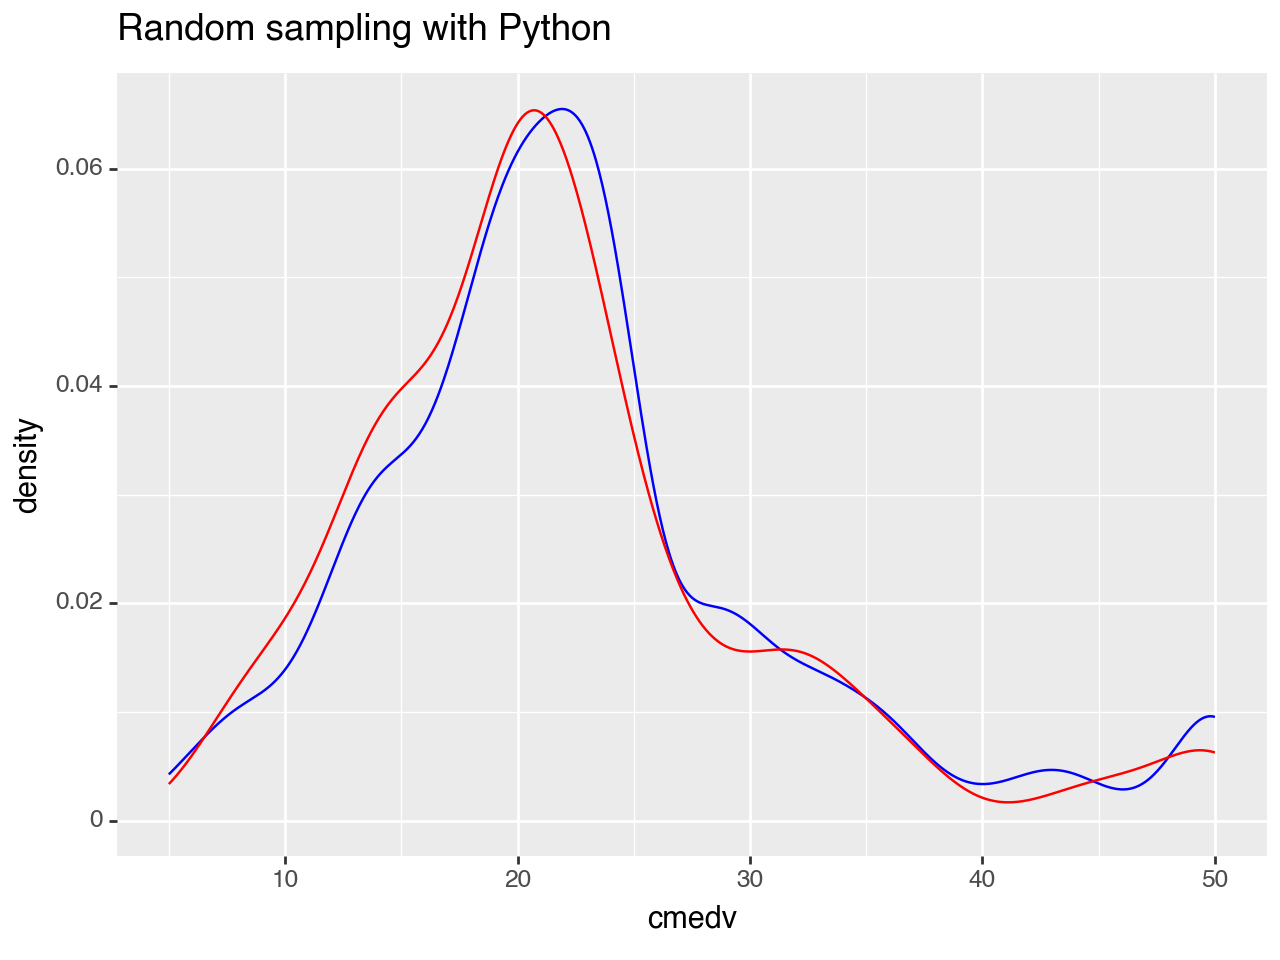

<Figure Size: (640 x 480)>

In [26]:
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

# plot distribution
(ggplot(train, aes('cmedv'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Random sampling with Python"))

4. Separate the features from the label (`cmedv`). You can go ahead and use all the features since they are all numeric.

In [27]:
X_train = train.drop("cmedv", axis=1)
y_train = train["cmedv"]

5. Fit a default KNN regression model (`KNeighborsRegressor()`). For this step do not use _k_-fold validation. What is the default MSE/RMSE for this model?

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math

# Instantiate the model object
knn = KNeighborsRegressor()

# Fit the model
knn.fit(X_train, y_train)

# compute RMSE for KNN model
pred = knn.predict(X_train)
mse = mean_squared_error(y_train, pred)
math.sqrt(mse)

5.117513851725159

6. Perform a 10-fold cross-validation for the default KNN model. 

   - Use the `neg_root_mean_squared_error` loss function.
   - Use `shuffle=True`.
   - Describe the results (i.e. what is the average RMSE across all 10 folds).

In [29]:
from sklearn.model_selection import KFold, cross_val_score

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# fit KNN model with 10-fold CV
results = cross_val_score(knn, X_train, y_train, cv=kfold, scoring=loss)

# summary stats for all 10 folds
pd.DataFrame(results * -1).describe()

,0
count,10.000000
mean,6.490741
std,1.404397
min,5.012222
25%,5.491047
50%,5.811542
75%,7.743200
max,8.783932


7. Now perform a hyperparameter grid search where _k_ ranges from 2--20 and apply 10-fold CV.

In [30]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter values to assess
hyper_grid = {'n_neighbors': range(2, 20)}

# Create grid search object
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)

# Tune a knn model using grid search
results = grid_search.fit(X_train, y_train)

In [31]:
# Best model's cross validated RMSE
abs(results.best_score_)

6.2497987793066665

In [32]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

2

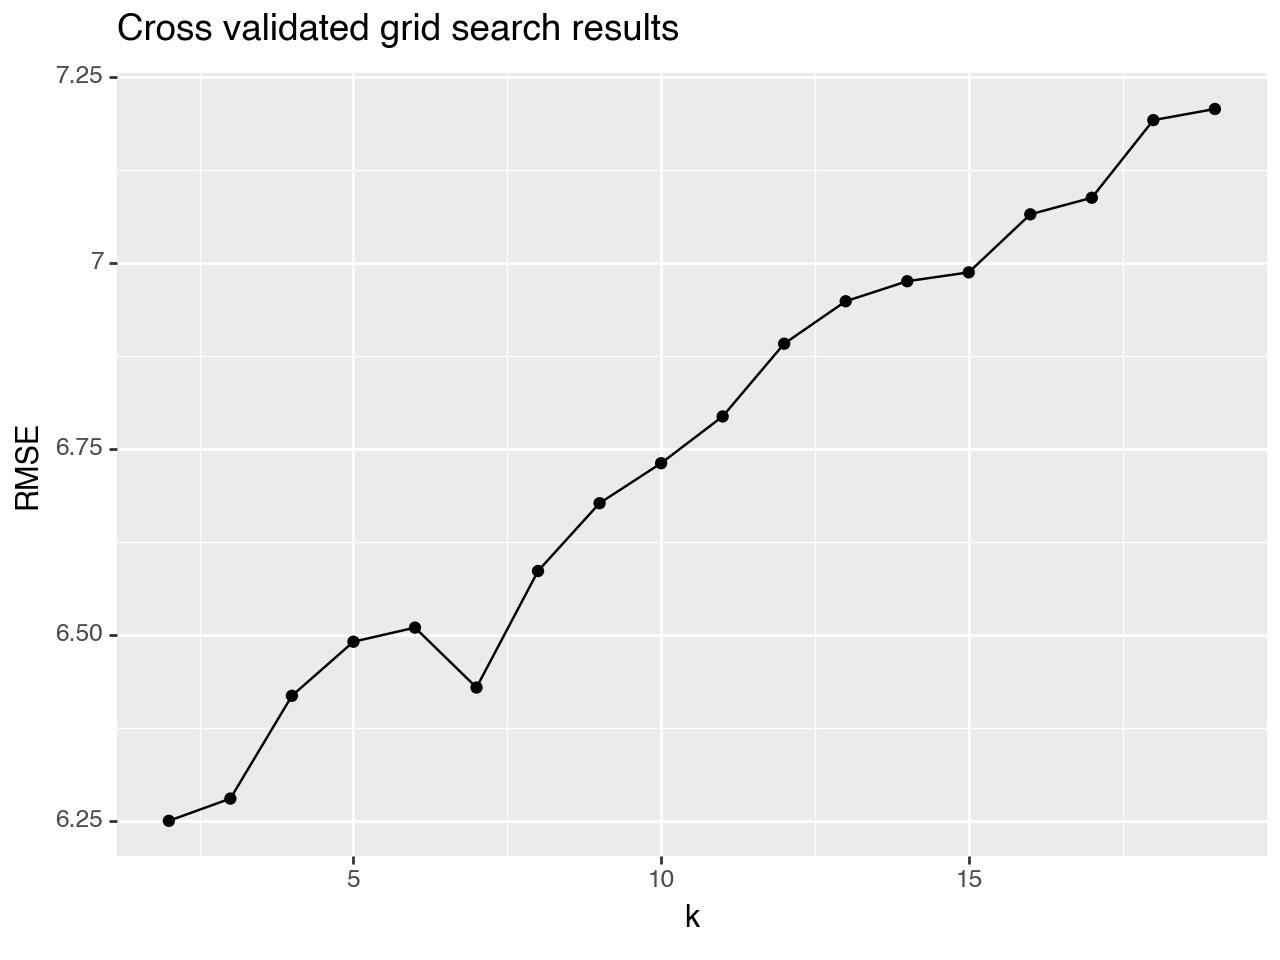

<Figure Size: (640 x 480)>

In [33]:
import numpy as np

# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 20), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

8. __STRETCH EXERCISE__: Perform a new model pipeline using:

* The `RandomForestRegressor` learning (available via `sklearn.ensemble` module)
* Perform a grid search for two hyperparameters:
   - `'n_estimators': [200, 400, 800]`
   - `'max_features': [4, 8, 12]`
* Use the same `kfold` and `loss` objects defined in exercise #7
* What is the best model's cross validated RMSE?
* How does this compare to the KNN model?
* What are the best model's hyperparameter settings?

In [34]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=123)

# Create the random grid
hyper_grid = {
    'n_estimators': [200, 400, 800],
    'max_features': [4, 8, 12],
}

# Create grid search object
grid_search = GridSearchCV(rf, hyper_grid, cv=kfold, scoring=loss)

# Tune a knn model using grid search
results = grid_search.fit(X_train, y_train)

CPU times: user 42.2 s, sys: 723 ms, total: 42.9 s
Wall time: 43 s


In [35]:
# Best model's cross validated RMSE
abs(results.best_score_)

3.045793876567392

In [36]:
# Best model's hyperparameter settings
results.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

*Python Environments*

7. While training and running your model should have been pretty fast, imagine that you are working with orders of magnitude more data -- so you want to train the model overnight, rather than interactively.
  * Export your Jupyter notebook as a `.py` script.
  * Be sure to add `print()` calls so you can see important data.
  * Run your `.py` file from the command line, and verify the results.

8. Think back to Lesson 8, on the data science ecosystem. 
  * Which package sounded most interesting/useful to you? 
  * If you are working on a platform with `conda`, create a new environment called "temporary".
  * Activate the `temporary` environment.
  * Install your package of choice package in `temporary`. 
  * Try to import it in a notebook (remember you'll need to get your conda environment working in Jupyter), and look in the online documentation (just google "package-name docs") to figure out what you can do with this package.